In [1]:
import swmm_api as sa
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

c:\Users\Jip\anaconda3\envs\py311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


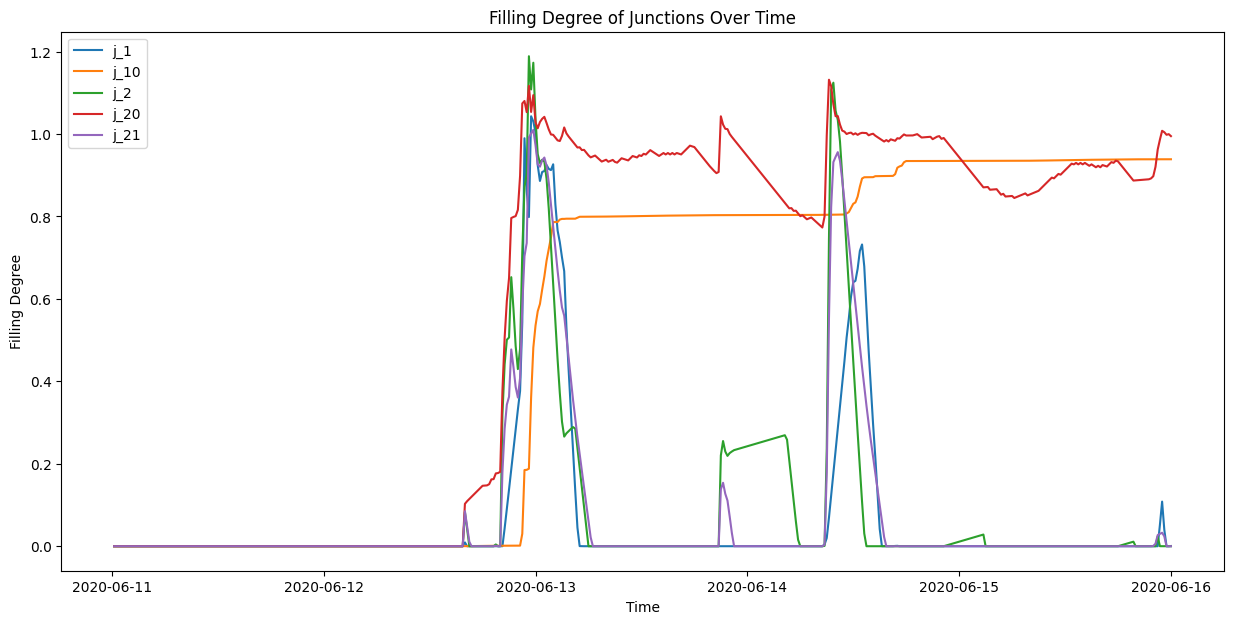

In [2]:
june = sa.read_out_file(rf'RTC\event_optimisation_input_data\Dean Town_pyswmm_1.out').to_frame()

junction_max_storage = {'j_1': 3055.37766896,
                        'j_10': 10852.4922214,
                        'j_2': 9821.97197181,
                        'j_20': 1900.3291314600003,
                        'j_21': 1163.19232848}

plt.figure(figsize=(15,7))
ax = plt.subplot(111)
for junction in junction_max_storage:
    june_filling_degre = pd.DataFrame(june['node'][junction]['volume'] / junction_max_storage[junction])
    plt.plot(pd.DataFrame(june['node'][junction]['volume'] / junction_max_storage[junction]).index, pd.DataFrame(june['node'][junction]['volume'] / junction_max_storage[junction]).values, label=junction)
    
plt.legend()
plt.xlabel('Time')
plt.ylabel('Filling Degree')
plt.title('Filling Degree of Junctions Over Time')
plt.show()

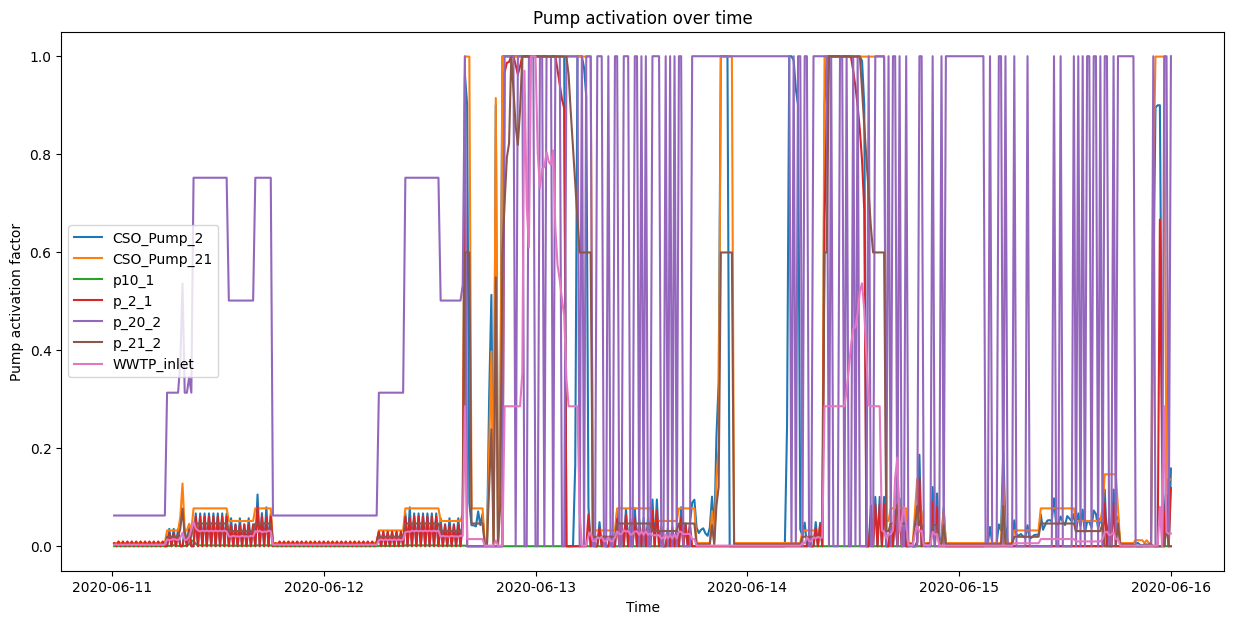

In [3]:
parameters = {
    "WWTP_inlet": 1.167,  # CMS
    "p10_1": 0.694,      # CMS
    "p_2_1": 0.500,       # CMS
    "p_20_2": 0.015,      # CMS
    "p_21_2": 0.0417,     # CMS
    "CSO_Pump_2": 0.5556, # CMS
    "CSO_Pump_21": 0.0278 # CMS
}



plt.figure(figsize=(15,7))
ax = plt.subplot(111)
for junction in ['CSO_Pump_2', 'CSO_Pump_21', 'p10_1', 'p_2_1', 'p_20_2', 'p_21_2', 'WWTP_inlet']:
    # june_filling_degre = pd.DataFrame(june['node'][junction]['volume'] / junction_max_storage[junction])
    plt.plot(pd.DataFrame(june['link'][junction]['flow']).index, 
             pd.DataFrame(june['link'][junction]['flow']).values / parameters[junction], label=junction)
    
plt.legend()
plt.xlabel('Time')
plt.ylabel('Pump activation factor')
plt.title('Pump activation over time')
plt.show()

In [4]:
parameters['WWTP_inlet']

1.167